In [1]:
"""
웹 스크래핍: 자동화된 sw를 사용하여 웹 사이트의 콘텐츠와 데이터를 추출하는 것
-자동 웹 네비게이션을 통한 내용 추출
 : 구글 크롤러->웹 사이트-> utl1, url2,, url3..... 알아서 가져옴
-http프로토콜을 이용한 특정 웹패이지 내용 추출
 : 
 
*웹스크래핑 절차
-대상 웹 사이트 식별
-데이터 추출하고자 하는 웹 페이지의 url 수집
-url에 html 문서 요청(http 프로토콜)
-반환된ㄴ html 문서를 검사 및 원하는 데이터 추출(parsing)
-json 또는 .csv 파일 또는 기카 구조화된 형식으로 데이터를 저장
"""
"""
python에서 제공하는 html request 라이브러리
beautifulsoup4 ; 
"""

'\npython에서 제공하는 html request 라이브러리\nbeautifulsoup4 ; \n'

In [7]:
import requests
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%A9%94%ED%83%80%EB%B2%84%EC%8A%A4'
res = requests.get(url) #http get request

html_doc = res.text #html 내용의 원문

# print(html_doc)

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta charset="utf-8"/>
  <meta content="always" name="referrer"/>
  <meta content="telephone=no,address=no,email=no" name="format-detection"/>
  <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/>
  <meta content="메타버스 : 네이버 통합검색" property="og:title">
   <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/>
   <meta content="'메타버스'의 네이버 통합검색 결과입니다." property="og:description"/>
   <meta content="'메타버스'의 네이버 통합검색 결과입니다." lang="ko" name="description"/>
   <title>
    메타버스 : 네이버 통합검색
   </title>
   <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/>
   <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml">
    <link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_211118.css" rel="stylesheet" type="text/css"
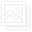
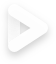
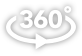
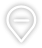
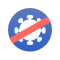
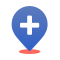
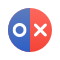
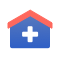

In [10]:
"""
Use beautiful soup
"""

from bs4 import BeautifulSoup

# creat a parser
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify()) #structuring the tags

[<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>,
 <a href="#content"><span>본문 영역으로 바로가기</span></a>,
 <a class="link" href="https://www.naver.com" onclick="return goOtherCR(this, 'a=sta.naver&amp;r=&amp;i=&amp;u='+urlencode(this.href));"><i class="spnew ico_logo">NAVER</i></a>,
 <a aria-pressed="false" class="bt_setkr" href="#" id="ke_kbd_btn" onclick="return tCR('a=sch.ime');" role="button"><i class="spnew ico_keyboard">한글 입력기</i></a>,
 <a aria-pressed="false" class="bt_atcp _btn_arw" data-atcmp-element="" href="#" id="nautocomplete" role="button"><i class="spnew ico_arrow">자동완성 레이어</i></a>,
 <a aria-pressed="false" class="item _delAll" href="#" role="button">전체삭제</a>,
 <a class="kwd" href="#"> <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span> </a>,
 <a aria-pressed="false" class="bt_item _del" href="#" role="button"><i class="imsc ico_del">삭제</i></a>,
 <a class="kwd_help" href="https://help.naver.com/support/alias/search/word/
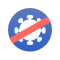
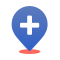
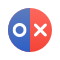
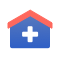

In [11]:
# Search all the <a> tags

soup.find_all('a')

In [12]:
# <a>는 많이 사용하므로 내가 원하는 뉴스 테그를
news = soup.find_all("a", {"class":"news_tit"})

In [14]:
# first news
news[0]

<a class="news_tit" href="http://www.fnnews.com/news/202112011635386588" onclick="return goOtherCR(this, 'a=nws_all*h.tit&amp;r=1&amp;i=880000FF_000000000000000004748879&amp;g=014.0004748879&amp;u='+urlencode(this.href));" target="_blank" title='신세계 아카데미 "메타버스·코딩 알려드려요"'>신세계 아카데미 "<mark>메타버스</mark>·코딩 알려드려요"</a>

In [16]:
# get url of the first news
news[0].get('href')

'http://www.fnnews.com/news/202112011635386588'

In [17]:
# get titile of the first news
news[0].get('title')

'신세계 아카데미 "메타버스·코딩 알려드려요"'

In [18]:
len(news)

4

In [19]:
# 기사 제목 추출
for i in range(len(news)):
    print(news[i].get('title'))

신세계 아카데미 "메타버스·코딩 알려드려요"
경북도 "메타버스 융합산업 클러스터 2개 조성"
[줌인]넥스트 메타버스는 ‘아크버스’…현실·가상을 연결하다
야나두, 메타버스 사업에 500억원 투자…"매출 1400억 목표"


In [20]:
"""
EX2. 
"""
url = 'https://kr.investing.com/equities/tesla-motors'
res = requests.get(url) #http get request

html_doc = res.text #html 내용의 원문

print(html_doc)

<!DOCTYPE html><html lang="ko" dir="ltr" class="html"><head><link rel="preload" href="//securepubads.g.doubleclick.net/tag/js/gpt.js" as="script" /><link rel="dns-prefetch" href="//i-invdn-com.investing.com" /><link rel="dns-prefetch" href="//d1-invdn-com.investing.com" /><link rel="dns-prefetch" href="//securepubads.g.doubleclick.net" /><link rel="dns-prefetch" href="//www.googletagmanager.com" /><link rel="preconnect" href="//i-invdn-com.investing.com" /><link rel="preconnect" href="//securepubads.g.doubleclick.net" /><link rel="preconnect" href="//live.sekindo.com" /><link rel="preconnect" href="//www.google-analytics.com" /><link rel="preconnect" href="//c.amazon-adsystem.com" /><link rel="preconnect" href="//connect.facebook.net" /><link rel="preconnect" href="//tpc.googlesyndication.com" /><link rel="preconnect" href="//lh5.googleusercontent.com" /><link rel="preconnect" href="//d1-invdn-com.investing.com" /><link rel="preconnect" href="//www.googletagmanager.com" /><script>
    

In [21]:
# creat a parser
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify()) #structuring the tags

<!DOCTYPE html>
<html class="html" dir="ltr" lang="ko">
 <head>
  <link as="script" href="//securepubads.g.doubleclick.net/tag/js/gpt.js" rel="preload"/>
  <link href="//i-invdn-com.investing.com" rel="dns-prefetch"/>
  <link href="//d1-invdn-com.investing.com" rel="dns-prefetch"/>
  <link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
  <link href="//www.googletagmanager.com" rel="dns-prefetch"/>
  <link href="//i-invdn-com.investing.com" rel="preconnect"/>
  <link href="//securepubads.g.doubleclick.net" rel="preconnect"/>
  <link href="//live.sekindo.com" rel="preconnect"/>
  <link href="//www.google-analytics.com" rel="preconnect"/>
  <link href="//c.amazon-adsystem.com" rel="preconnect"/>
  <link href="//connect.facebook.net" rel="preconnect"/>
  <link href="//tpc.googlesyndication.com" rel="preconnect"/>
  <link href="//lh5.googleusercontent.com" rel="preconnect"/>
  <link href="//d1-invdn-com.investing.com" rel="preconnect"/>
  <link href="//www.googletagmanager.com

In [22]:
keys = soup.find_all('dt')
print(keys)

[<dt>전일 종가</dt>, <dt>금일 변동</dt>, <dt>매출</dt>, <dt>금일 시가</dt>, <dt>52주 변동폭</dt>, <dt>주당순이익</dt>, <dt>거래량</dt>, <dt>총 시가</dt>, <dt>배당금</dt>, <dt>평균 거래량</dt>, <dt>주가수익비율</dt>, <dt>베타</dt>, <dt>1년 변동률</dt>, <dt>발행주식수</dt>, <dt>다음 실적 발표일</dt>]


In [26]:
vals = soup.find_all('span',{'class':'key-info_dd-numeric__2cYjc'})
print(vals)

[<span class="key-info_dd-numeric__2cYjc"><span>1,144.76</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,090.76</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,172.84</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>46.85</span><span>B</span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,160.69</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>539.49</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1,243.49</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>3.08</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>22,500,809</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>1.1</span><span>T</span></span>, <span class="key-info_dd-numeric__2cYjc"><span>24,761,515</span><span></span></span>, <span class="key-info_dd-numeric__2cYjc"><span>371.47</span><span></span></span>, <

In [27]:
for i in range(len(vals)):
    print(keys[i].get_text(), '=', vals[i].get_text())

전일 종가 = 1,144.76
금일 변동 = 1,090.76
매출 = 1,172.84
금일 시가 = 46.85B
52주 변동폭 = 1,160.69
주당순이익 = 539.49
거래량 = 1,243.49
총 시가 = 3.08
배당금 = 22,500,809
평균 거래량 = 1.1T
주가수익비율 = 24,761,515
베타 = 371.47
1년 변동률 = 2.04
발행주식수 = 87.26%
다음 실적 발표일 = 1,006,419,424
